# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [1]:
library(igraph)
library(dplyr)


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'dplyr'


The following objects are masked from 'package:igraph':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
### dataset
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

,X2B,X410,AER,X2965,KZN,X2990,X,X0,CR2
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,2B,410,CEK,2968,OVB,4078,,0,CR2
5,2B,410,DME,4029,KZN,2990,,0,CR2
6,2B,410,DME,4029,NBC,6969,,0,CR2


In [8]:
### companies flight counts
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B,n
FR,2484
AA,2354
UA,2180
DL,1981
US,1960
CZ,1454
MU,1263
CA,1260
WN,1146
U2,1130


In [3]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="IB") %>% tally()

n
<int>
831


In [4]:
df2 <- df %>% filter(X2B=="IB") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

AER,KZN,cnt
<fct>,<fct>,<int>
AAL,BCN,1
ABZ,LHR,1
ACC,MAD,1
ACE,BCN,1
ACE,BIO,1
ACE,LGW,1


In [5]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN)))) #unique - מבטל כפילויות

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [6]:
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}


In [7]:
links <- as.matrix(mtx)


In [8]:
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [9]:
### network size by edges
E(mynet)

+ 831/831 edges from 832c3b9:
 [1]  1-> 18  2-> 97  3->106  4-> 18  4-> 24  4-> 96  4->106  5->  9  5-> 18
[10]  5-> 24  5-> 32  5-> 39  5-> 40  5-> 44  5-> 49  5-> 59  5-> 73  5-> 74
[19]  5-> 90  5-> 96  5->103  5->105  5->106  5->116  5->119  5->126  5->131
[28]  5->134  5->138  5->156  5->172  5->174  5->185  6->  9  6-> 18  6-> 24
[37]  6-> 32  6-> 40  6-> 44  6-> 49  6-> 59  6-> 78  6-> 96  6->103  6->106
[46]  6->130  6->131  6->138  7-> 18  7->106  8-> 18  8->106  9->  5  9->  6
[55]  9-> 18  9-> 24  9-> 78  9->138  9->169  9->185 10-> 96 10->145 10->162
[64] 10->198 11-> 99 12-> 18 12-> 97 12->106 13-> 18 14-> 97 14->113 14->129
[73] 15-> 97 15->110 16-> 97 17-> 50 17-> 97 18->  1 18->  4 18->  5 18->  6
[82] 18->  7 18->  8 18->  9 18-> 12 18-> 13 18-> 20 18-> 22 18-> 24 18-> 25
+ ... omitted several edges

In [10]:
### network size by vertices (nodes)
V(mynet)

+ 198/198 vertices, from 832c3b9:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
+ ... omitted several vertices

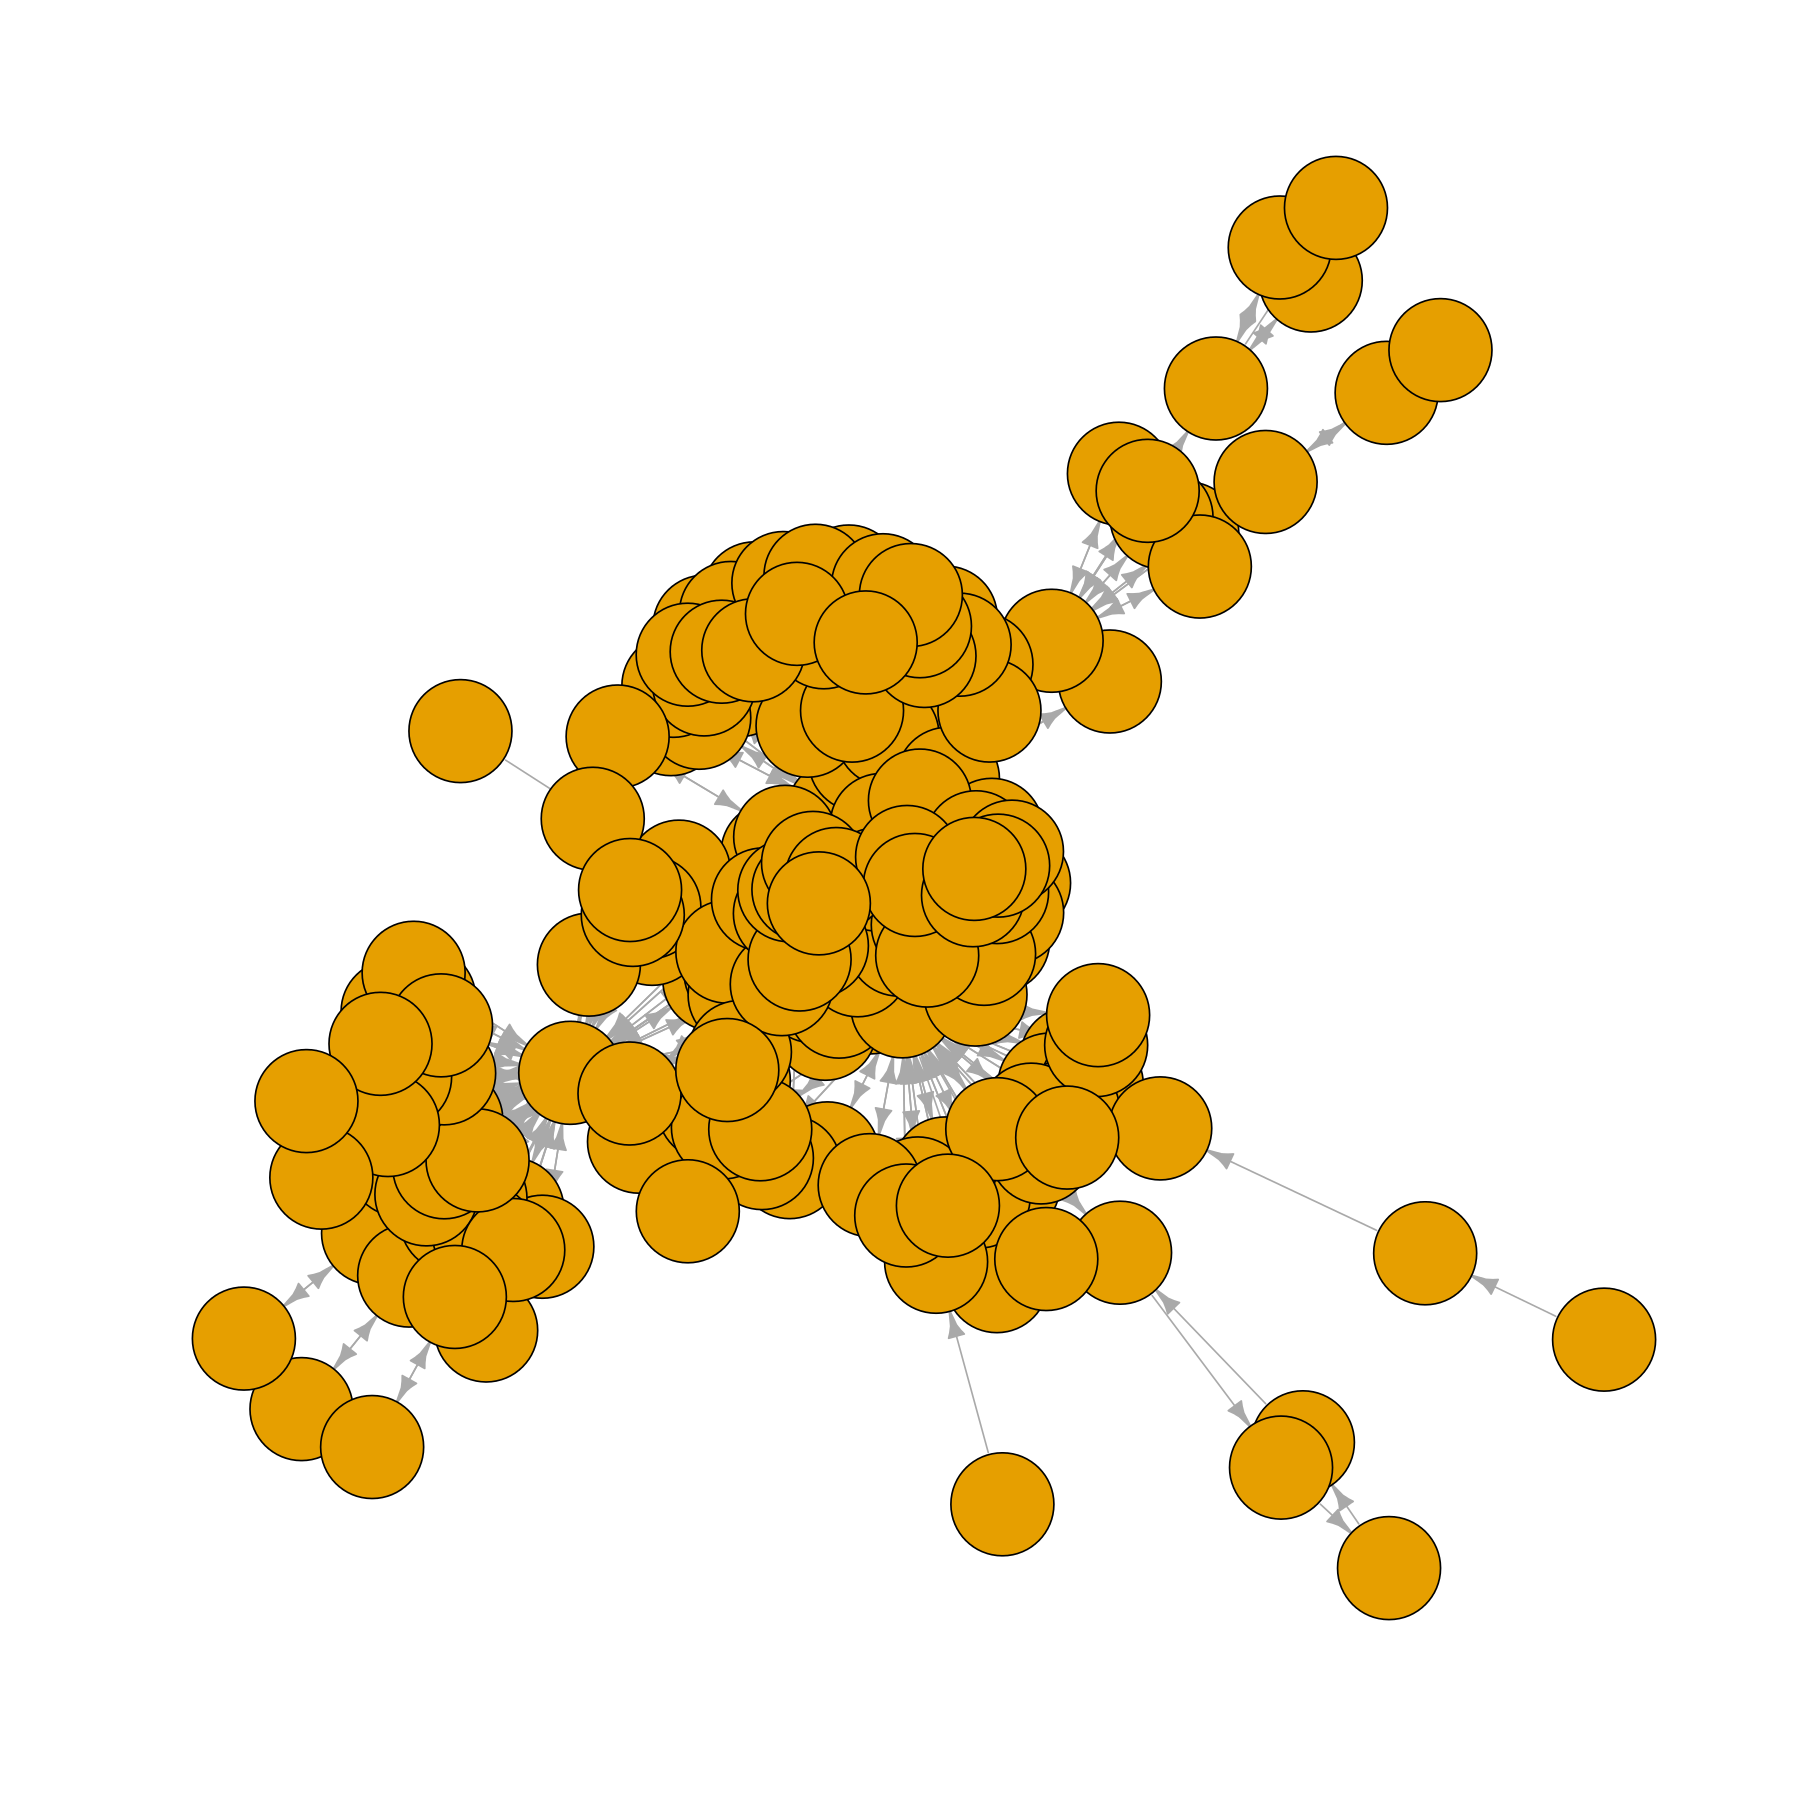

In [12]:
options(repr.plot.width = 15, repr.plot.height =15)

plot(mynet, edge.arrow.size=.4, vertex.label=NA)

### Measures

In [25]:
mean_distance(mynet, directed=F)

[1] 2.222222

In [26]:
diameter(mynet, directed=F,weights=NA)

[1] 4

In [27]:
centr_degree(mynet,mode="in",normalized=T)

$res
[1] 1 1 1 1 1 2 1 0 6

$centralization
[1] 0.5555556

$theoretical_max
[1] 72

In [28]:
edge_density(mynet,loops=F)

[1] 0.1944444

In [29]:
degree(mynet)

[1]  2  2  2  2  2  3  2  1 12

In [30]:
mean(degree(mynet))

[1] 3.111111

### Clusters

In [13]:
cliques(mynet)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[[1]]
+ 1/198 vertex, from 832c3b9:
[1] 18

[[2]]
+ 1/198 vertex, from 832c3b9:
[1] 185

[[3]]
+ 1/198 vertex, from 832c3b9:
[1] 129

[[4]]
+ 1/198 vertex, from 832c3b9:
[1] 90

[[5]]
+ 1/198 vertex, from 832c3b9:
[1] 161

[[6]]
+ 1/198 vertex, from 832c3b9:
[1] 116

[[7]]
+ 1/198 vertex, from 832c3b9:
[1] 47

[[8]]
+ 1/198 vertex, from 832c3b9:
[1] 10

[[9]]
+ 1/198 vertex, from 832c3b9:
[1] 181

[[10]]
+ 1/198 vertex, from 832c3b9:
[1] 111

[[11]]
+ 1/198 vertex, from 832c3b9:
[1] 99

[[12]]
+ 1/198 vertex, from 832c3b9:
[1] 180

[[13]]
+ 1/198 vertex, from 832c3b9:
[1] 160

[[14]]
+ 1/198 vertex, from 832c3b9:
[1] 155

[[15]]
+ 1/198 vertex, from 832c3b9:
[1] 153

[[16]]
+ 1/198 vertex, from 832c3b9:
[1] 87

[[17]]
+ 1/198 vertex, from 832c3b9:
[1] 85

[[18]]
+ 1/198 vertex, from 832c3b9:
[1] 82

[[19]]
+ 1/198 vertex, from 832c3b9:
[1] 57

[[20]]
+ 1/198 vertex, from 832c3b9:
[1] 30

[[21]]
+ 1/198 vertex, from 832c3b9:
[1] 29

[[22]]
+ 1/198 vertex, from 832c3b9:
[1] 17

[[23]]
+ 

In [14]:
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 [112] 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [149] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2
 [186] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2
 [223] 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 3 3 2 3 3 3 2 2 2 2 1 2 3 3 2 2 2 1 2 3
 [260] 2 3 3 3 2 2 2 1 2 3 3 2 2 1 2 3 2 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 2 1 2 3
 [297] 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 3
 [334] 2 2 1 2 3 2 1 2 3 2 1 2 3 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1
 [371] 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 3 2 2 1 2 3 2 1 2 3 2 1 2 3 3 2 2 1 2
 [408] 3 3 2 2 1 2 3 2 1 2 3 3 2 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 4 4 3 3 2 3 4 3
 [445] 2 3 4 4 3 3 2 3 4 4 3 3 2 3 4 4 3 3 2 3 4 4 3 4 4 4 3 3 3 2 3 2 3 2 3 2 3
 [482] 2 3 3 2 3 3 3 3 2 2 2 2 1 2 3 4 3 2 3 4 4 3 3 2 3 4 4 3 3 2 3 4 4 3 4 4 3
 [519] 3 2 3 3 2 3 3 2 2 1 2 3 4 3 2 3 4 3 2 3 4 3 2 3 4 3 4 3 2 3 2 3 2 3 2 3 2
 [556] 1 2 3 4 3 2 3 4 3 2 3 4 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 4
 [630] 3 2 3 2 1 2 3 4 3 2 3 2 3 2 1 2 3 4 3 2 3 2 1 2 3 4 3 2 3 2 1 2 3 4 4 3 3
 [667] 2 3 3 2 2 1 2 3 4 4 3 3 2 3 3 3 2 2 2 1 2 3 4 3 2 3 2 1 2 3 4 3 2 3 2 1 2
 [704] 3 4 3 2 3 4 5 4 3 4 3 3 2 3 4 5 4 3 4 5 4 3 4 5 4 3 4 3 2 3 4 5 5 4 4 3 4
 [741] 5 5 4 4 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 5 4 4 3 4 5 5 4 4 3 4 5 5 4 4 3 4 5
 [778] 5 4 4 3 4 4 3 3 2 3 4 3 2 3 4 3 2 3 4 3 2 3 4 3 2 3 4 4 3 3 2 3 4 4 3 3 2
 [815] 3 4 4 3 3 2 3 4 4 3 3 2 3 3 2 2 2 2 1 2 3 4 5 4 3 4 5 4 3 4 5 4 3 4 3 2 3
 [852] 4 3 2 3 4 3 2 3 4 3 2 3 2 3 2 1 2 3 4 5 4 3 4 3 2 3 4 5 4 3 4 3 2 3 4 3 2
 [889] 3 2 1 2 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 5 4 4 3 4 4 3 3 2 3 4 4 3 3 2 3 2 3
 [926] 3 2 2 1 2 3 4 3 2 3 4 5 4 3 4 3 2 3 4 3 2 3 2 1 2 3 3 4 4 3 3 2 3 2 3 4 3
 [963] 2 2 2 3 2 3 3 2 2 1 2 3 4 5 4 3 4 3 2 3 4 5 4 3 4 3 2 3 4 3 2 3 2 1 2 3 4
[1000] 5 4 3 4 3 2 3 4 5 4 3 4 3 2 3 4 3 2 3 2 1 2 3 4 3 2 3 4 3 2 3 4 3 2 3 2 1
[1037] 2 3 4 5 6 5 4 5 4 3 4 5 6 5 4 5 4 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 4 3 4 3 2
[1074] 3 4 5 4 5 4 3 4 3 4 3 2 3 4 4 3 4 4 4 3 3 3 2 3 3 2 3 3 3 2 2 2 1 2 3 4 5
[1111] 4 3 4 5 4 3 4 3 2 3 3 4 3 2 3 4 3 2 3 4 3 2 3 4 3 2 2 3 2 3 3 2 2 1 2 3 4
[1148] 5 6 5 4 5 4 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 6 5 4 5 4 3 4 5 4 3 4 3 2 3 4 5
[1185] 4 3 4 5 4 3 4 3 2 3 4 5 5 4 4 3 4 5 5 4 4 3 4 4 3 3 2 3 4 3 2 3 4 3 2 3 4
[1222] 3 2 3 4 4 3 3 2 3 4 4 3 3 2 3 3 2 2 1 2 3 4 5 6 7 6 5 6 5 4 5 6 7 6 5 6 5
[1259] 4 5 6 6 5 5 4 5 5 4 4 3 4 5 6 5 4 5 4 3 4 5 6 5 6 5 4 5 4 5 4 3 4 5 5 4 5
[1296] 5 4 4 3 4 4 3 4 4 3 3 2 3 4 5 6 5 4 5 6 5 4 5 6 5 4 5 4 3 4 5 4 3 4 5 4 3
[1333] 4 5 4 3 4 3 2 3 4 5 6 5 4 5 4 3 4 5 6 5 4 5 6 5 4 5 4 3 4 5 6 6 5 5 4 5 6
[1370] 6 5 5 4 5 6 6 5 5 4 5 5 4 4 3 4 5 6 6 5 5 4 5 6 6 5 5 4 5 6 6 5 5 4 5 5 4
[1407] 4 3 4 5 5 4 4 3 4 5 5 4 4 3 4 5 5 4 4 3 4 4 3 3 2 3 4 3 2 3 4 5 4 3 4 5 4
[1444] 3 4 3 2 3 4 5 4 3 4 5 4 5 4 3 4 3 4 3 2 3 4 5 4 3 4 5 5 4 4 3 4 5 5 4 4 3
[1481] 4 5 5 4 5 5 4 4 3 4 4 3 4 4 3 3 2 3 4 5 5 4 4 3 4 5 5 4 4 3 4 5 5 4 5 5 4
[1518] 4 3 4 4 3 4 4 3 3 2 3 4 3 2 3 4 3 2 3 4 3 2 3 4 3 2 3 4 3 2 3 4 4 3 3 2 3
[1555] 4 4 3 3 2 3 4 4 3 4 4 3 3 2 3 3 2 3 3 2 2

In [15]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
"At cliques.c:1087 :directionality of edges is ignored for directed graphs"


[[1]]
+ 7/198 vertices, from 832c3b9:
[1]  18 106 138  97  24  78 131

[[2]]
+ 7/198 vertices, from 832c3b9:
[1]  18 106 138  78   6  24 131


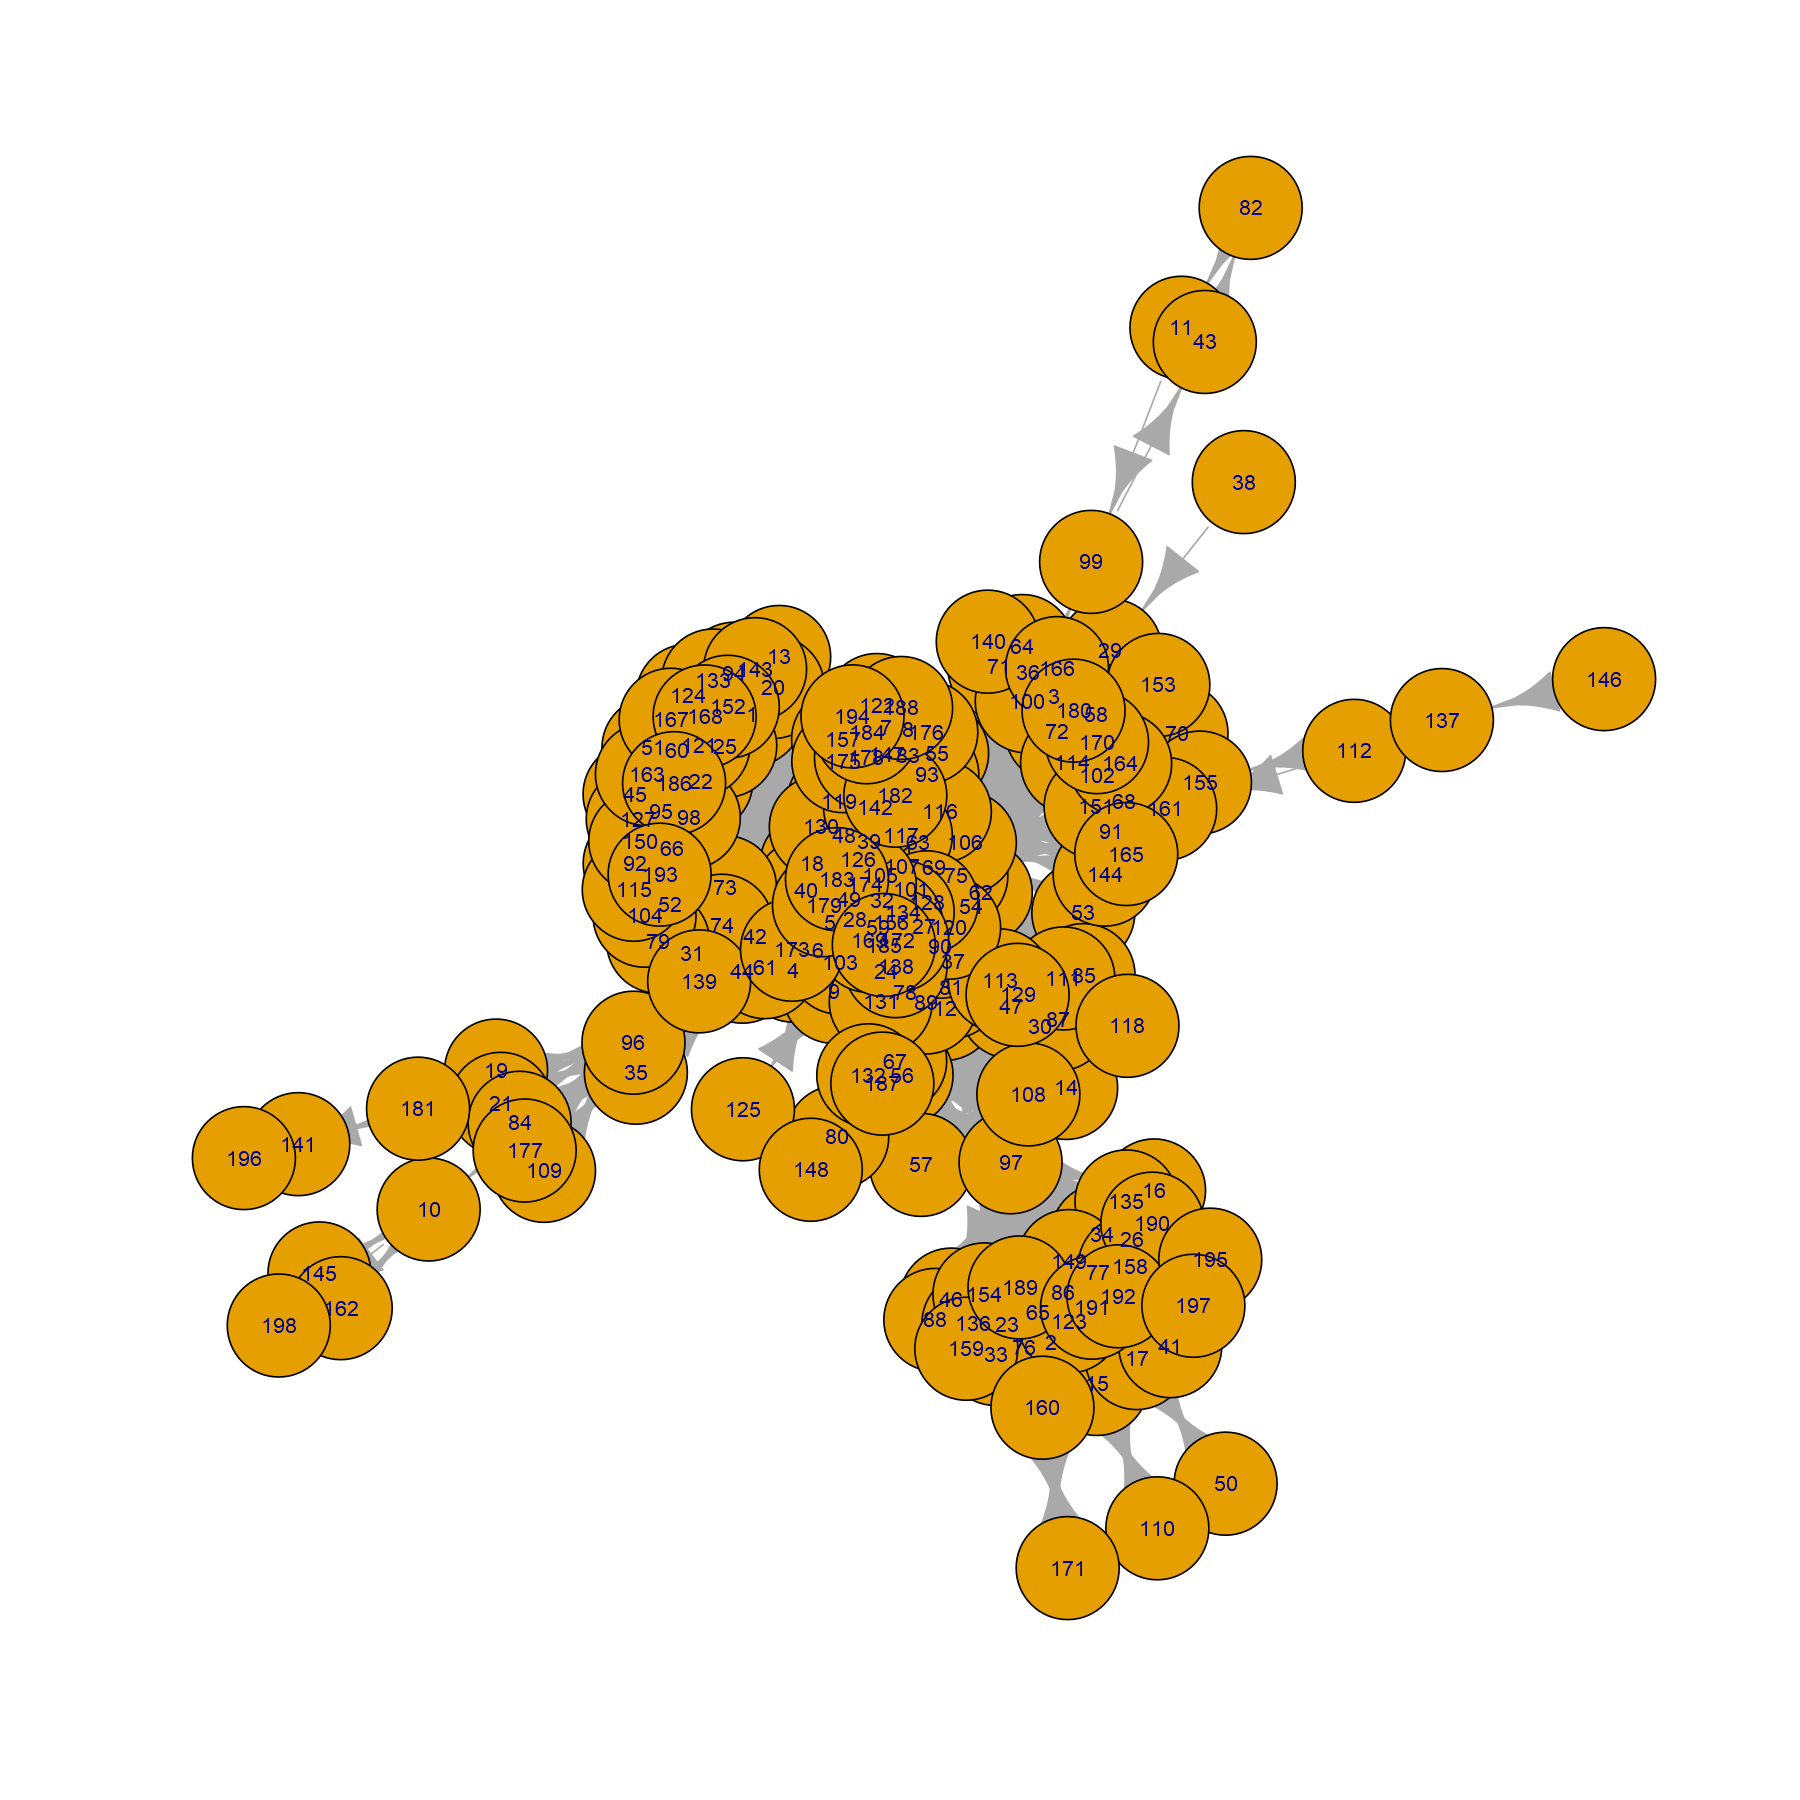

In [16]:
plot(as.directed(mynet))

### Hubs

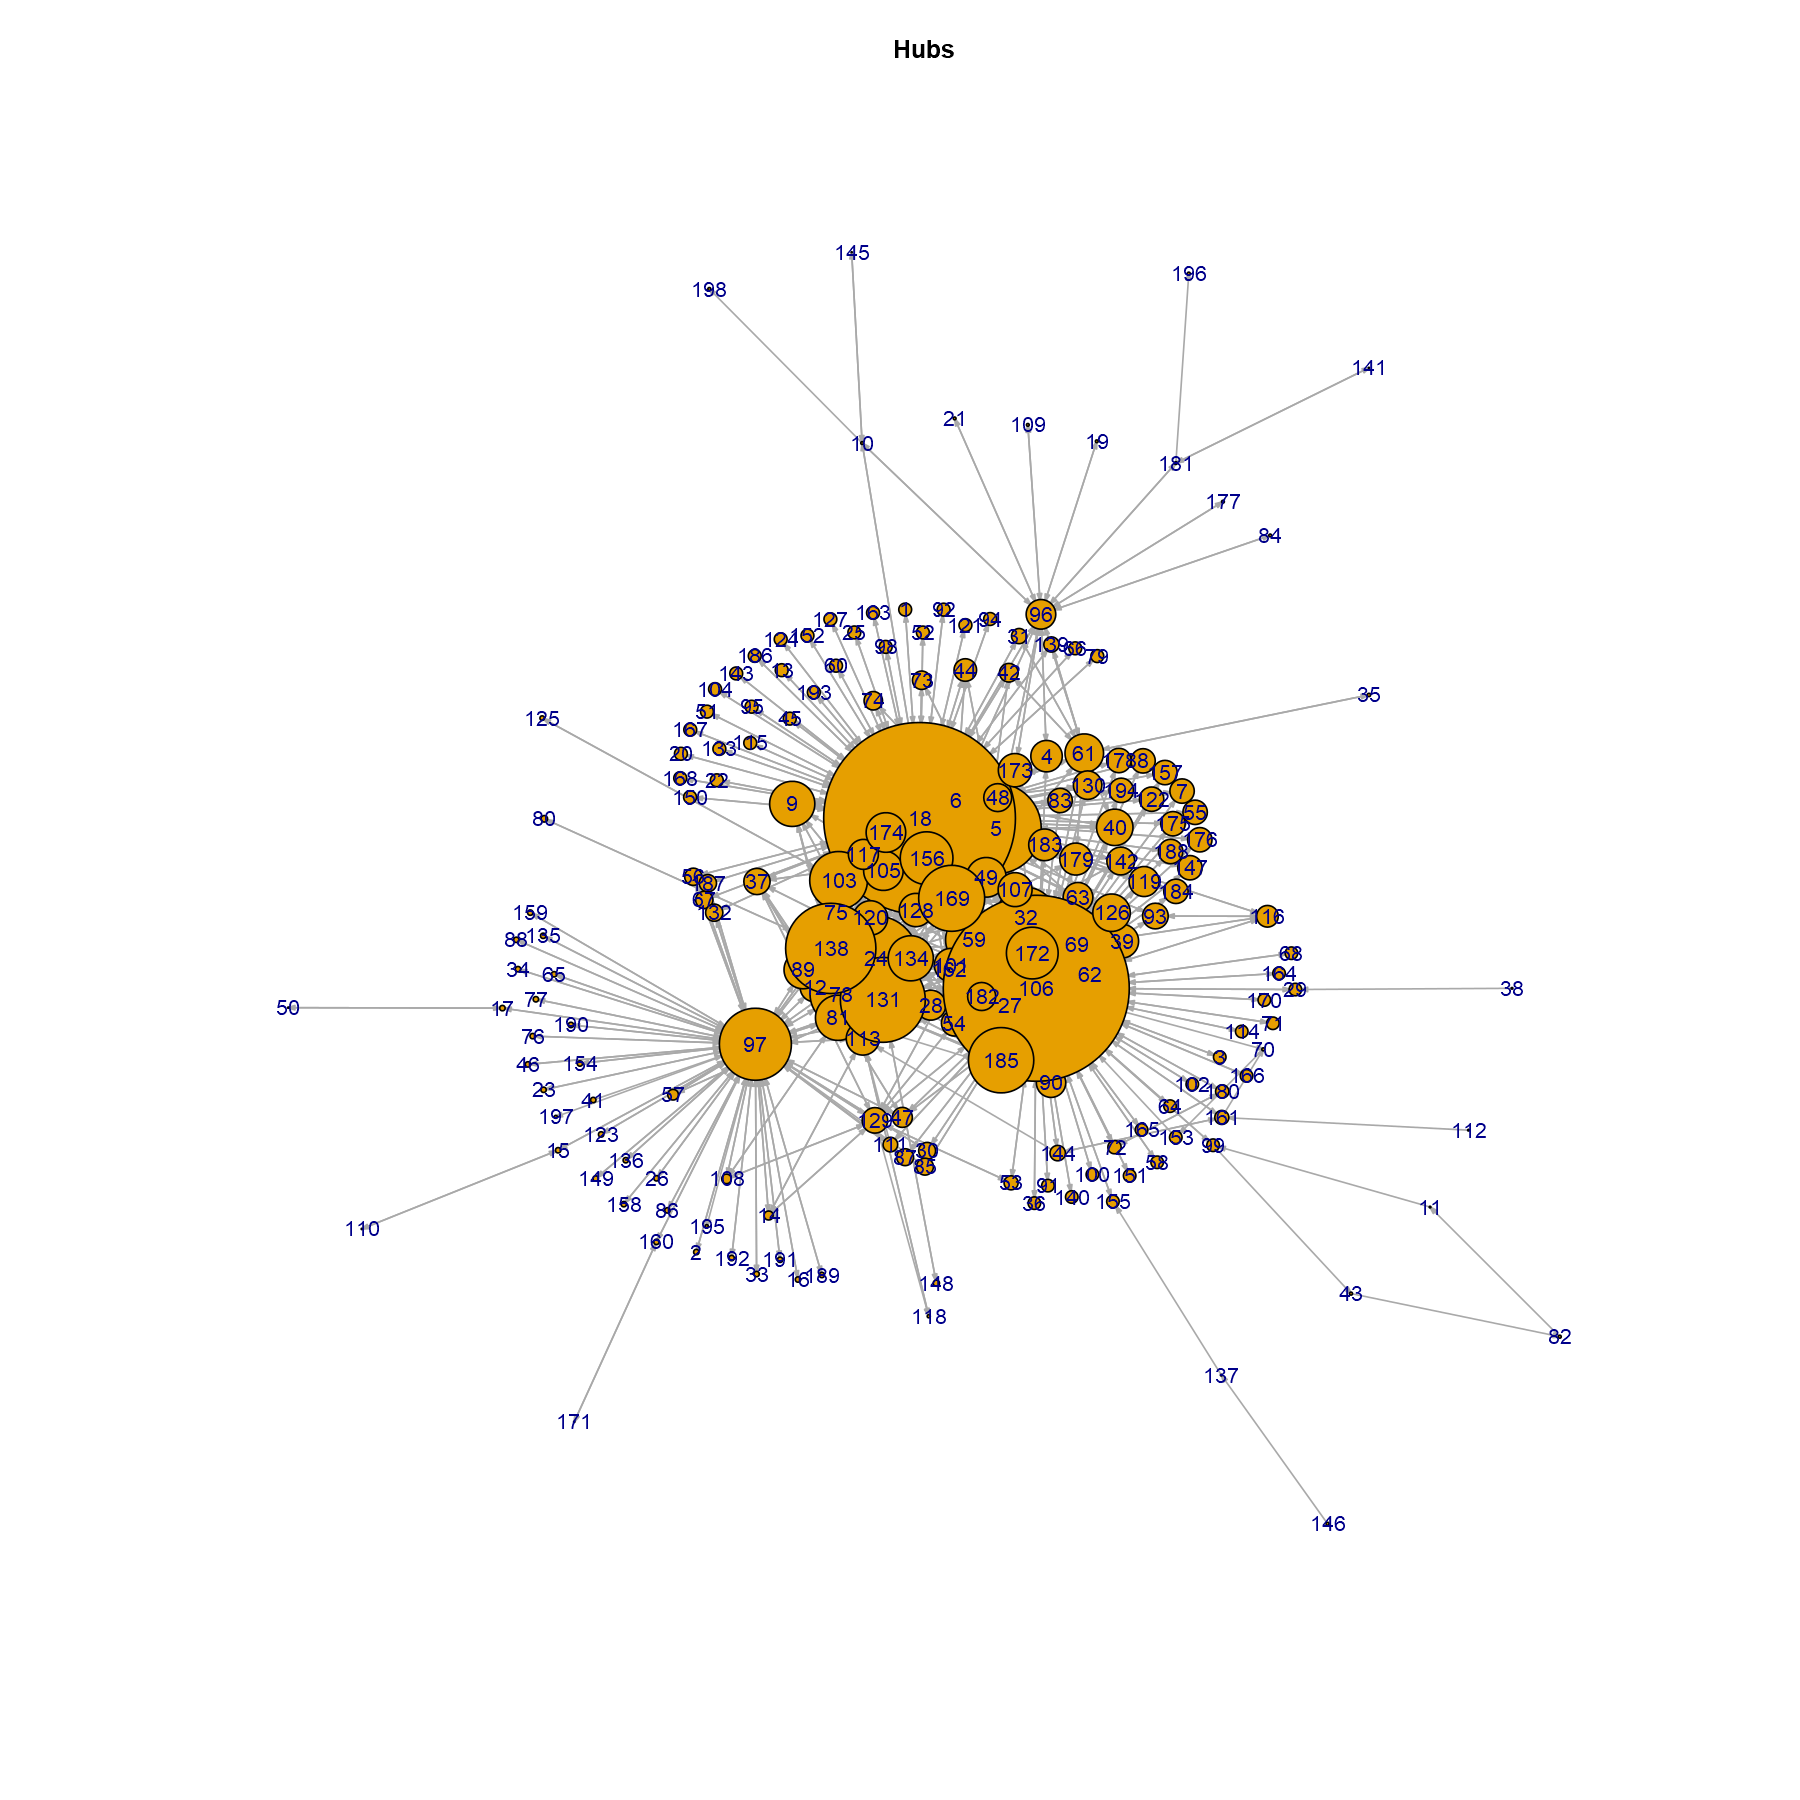

In [17]:
set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 30,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Authority

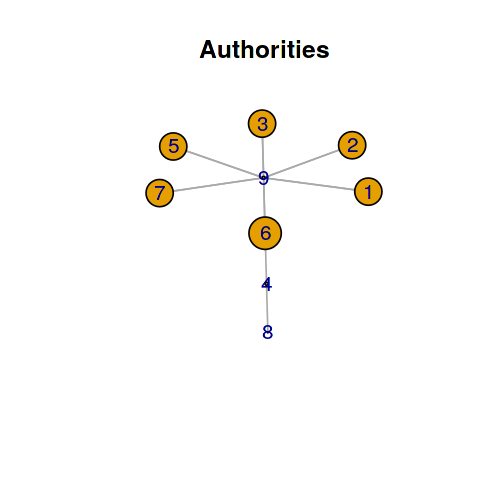

In [43]:
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 30,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

Warning message in cluster_edge_betweenness(mynet):
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”Warning message in cluster_edge_betweenness(mynet):
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”

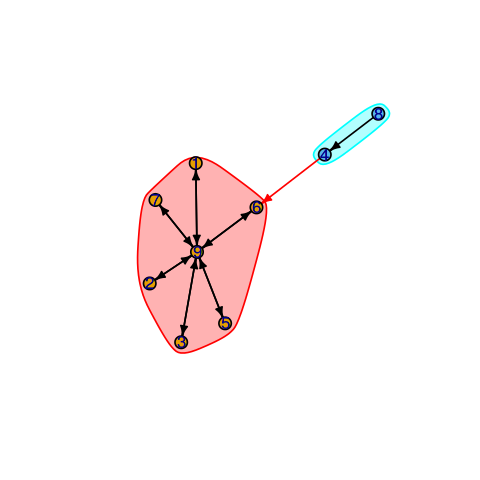

In [44]:
### community
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=10, vertex.label.cex=0.8)

In [47]:
btwn <- cluster_edge_betweenness(mynet)
btwn

Warning message in cluster_edge_betweenness(mynet):
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”Warning message in cluster_edge_betweenness(mynet):
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”

IGRAPH clustering edge betweenness, groups: 2, mod: 0.12
+ groups:
  $`1`
  [1] 1 2 3 5 6 7 9
  
  $`2`
  [1] 4 8
  

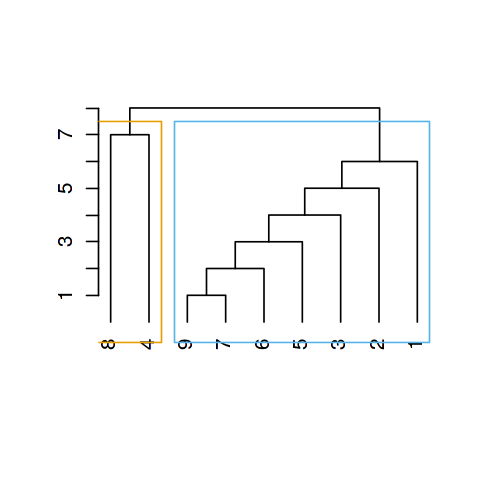

In [48]:
dendPlot(btwn, mode="hclust")

In [45]:
length(btwn)

[1] 2

In [46]:
membership(btwn)

[1] 1 1 1 2 1 1 1 2 1